In [249]:
import numpy as np
import time
import sys
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import tensorflow as tf
import torchvision
import torch
from torchsummary import summary

from sklearn.metrics import accuracy_score

from torch.utils.data import DataLoader
from torch import optim
from torch.autograd import Variable

# Parameters

In [250]:
BATCH_SIZE = 100
EPOCHS = 2
LEARNING_RATE = 0.01
LOSS_FUNCTION = nn.CrossEntropyLoss()

# Importing Data

In [251]:
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(),
)

testing_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

In [252]:
data_loaders = {
    'train' : DataLoader(training_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=1),
    'test'  : DataLoader(testing_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=1),
}

# Helper Functions

In [108]:
def displayMNIST(data, index, title="Title", save=False):
    
    plt.imshow(data.data[index], cmap='gray')
    
    if save: plt.savefig(title+".png")
    
    plt.show()

In [109]:
def displayImage(data, index, title="Title", save=False):
    
    data = [item.detach().numpy() for item in data]
    
    plt.imshow(data[index].reshape(28,28), cmap='gray')
    
    if save: plt.savefig(title+".png")
    
    plt.show()

In [110]:
def getLabel(data, index):
    
    return data.targets[index].numpy().item()

In [111]:
def plotAccuracy(accuracy, title="Title", save=False):
    
    plt.plot(range(len(accuracy)), accuracy, '-g', label='Accuracy')
    
    plt.legend(loc='upper left')
    
    if save: plt.savefig(title+"_Accuracy.png")

    plt.show()

In [112]:
def plotLoss(loss, title="Title", save=False):
    
    plt.plot(range(len(loss)), loss, '-r', label='Loss')
    
    plt.legend(loc='upper left')
    
    if save: plt.savefig(title+"_Loss.png")

    plt.show()

In [113]:
def removeTrueLabelFromTensor(T, i):
    T[i] = (-1000000000.0)
    return T

# CNN Implementation

In [145]:
class CNN1 (nn.Module) :
    
    def __init__(self):
        
        super(CNN1, self).__init__()
        
        self.layer1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=8,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.out = nn.Linear(2304, 10)
    
    def forward(self, x):
        
        x = self.layer1(x)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization

In [177]:
class CNN2 (nn.Module):
    
    def __init__(self):
        
        super(CNN2, self).__init__()
        
        self.layer1 = nn.Sequential( 
            nn.Conv2d(
                in_channels = 1,              
                out_channels = 32,            
                kernel_size = 2,              
                stride = 1,                   
                padding = 2,                  
            ), 
            nn.BatchNorm2d(32),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 2),    
        )
        self.layer2 = nn.Sequential(  
            nn.Conv2d(
                in_channels = 32, 
                out_channels = 64, 
                kernel_size = 2, 
                stride = 1, 
                padding = 2),  
            nn.BatchNorm2d(64),
            nn.ReLU(),   
            nn.MaxPool2d(kernel_size=2),                
        )

        self.out = nn.Linear(5184, 10)
    
    def forward(self, x):
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization

In [272]:
class CNN3 (nn.Module) :
    
    def __init__(self):
        
        super(CNN3, self).__init__()
        
        self.layer1 = nn.Sequential(         
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=5, stride=1, padding=2),  
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
        )
        self.layer2 = nn.Sequential(  
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),            
        )
        self.fc1 = nn.Sequential(
            nn.Linear(in_features=784, out_features=120),
            nn.ReLU(),
        ) 
        self.fc2 = nn.Sequential(
            nn.Linear(in_features=120, out_features=120),
            nn.ReLU(),
        ) 
        self.out = nn.Linear(120, 10)
    
    def forward(self, x):
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)  
        x = self.fc2(x)  
        output = self.out(x)
        return output, x    # return x for visualization

In [273]:
mod = CNN()
summary(mod, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 25, 25]           1,040
              ReLU-2           [-1, 16, 25, 25]               0
         MaxPool2d-3           [-1, 16, 12, 12]               0
            Linear-4                   [-1, 10]          23,050
Total params: 24,090
Trainable params: 24,090
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.17
Params size (MB): 0.09
Estimated Total Size (MB): 0.27
----------------------------------------------------------------


In [274]:
mod3 = CNN3()
summary(mod3, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]             208
              ReLU-2            [-1, 8, 28, 28]               0
         MaxPool2d-3            [-1, 8, 14, 14]               0
            Conv2d-4           [-1, 16, 14, 14]           3,216
              ReLU-5           [-1, 16, 14, 14]               0
         MaxPool2d-6             [-1, 16, 7, 7]               0
            Linear-7                  [-1, 120]          94,200
              ReLU-8                  [-1, 120]               0
            Linear-9                  [-1, 120]          14,520
             ReLU-10                  [-1, 120]               0
           Linear-11                   [-1, 10]           1,210
Total params: 113,354
Trainable params: 113,354
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

In [278]:
def getLossAccuracy(cnn_model, data_load, dataset, details=False):

    cnn_model.eval()
    
    with torch.no_grad():
        
        correct = 0
        total = 0
        
        for data, label in data_load[dataset]:
            
            #print("TRUE_LABEL SIZE: "+str(len(label)))
            
            output_label, last_layer = cnn_model(data)
            pred_y = torch.max(output_label, 1)[1].data.squeeze()
            
            #print("PREDICTIONS SIZE: "+str(len(pred_y)))
            
            accuracy = (pred_y == label).sum().item() / float(label.size(0))
            loss = LOSS_FUNCTION(output_label, label).item()
    
    if details: print(dataset+' loss: %.5f' % loss)
    if details: print(dataset+' accuracy: %.5f' % accuracy)
        
    return (loss, accuracy)

In [259]:
def train(cnn_model, data_load, optim):
    
    training_accuracy = []
    training_loss = []
    
    cnn_model.train()
    
    # Initial Training Loss and Accuracy
    (tr_loss, tr_accuracy) = getLossAccuracy(cnn_model, data_load, 'train')            
    training_loss.append(tr_loss)
    training_accuracy.append(tr_accuracy)

    # Train the model
    total_step = len(data_load['train'])

    for epoch in range(EPOCHS):
        for i, (training_data, training_label) in enumerate(data_load['train']):
            
            batch_data = Variable(training_data)
            batch_label = Variable(training_label) 
            output_label, _ = cnn_model(batch_data)               
            
            loss = LOSS_FUNCTION(output_label, batch_label)
  
            optim.zero_grad()           
            loss.backward()             
            optim.step()                

            if (i+1) % 200 == 0:
                print ('Epoch [{}/{}], Progress [{}/{}], Loss: {:.4f}' .format(epoch + 1, EPOCHS, i + 1, total_step, loss.item()))
            
        
        # GET LOSS AND ACCURACY AT EVERY EPOCH
        (tr_loss, tr_accuracy) = getLossAccuracy(cnn_model, data_load, 'train')            
        training_loss.append(tr_loss)
        training_accuracy.append(tr_accuracy)
        #print ('      Training Loss: {:.4f}, Training Accuracy: {:.4f}' .format(tr_loss, tr_accuracy))
            
    return (training_loss, training_accuracy)

### Example

In [279]:
cnn_test = CNN3()
optimizer = optim.Adam(cnn_test.parameters(), lr = LEARNING_RATE)  

In [280]:
(train_loss, train_accuracy) = train(cnn_test, data_loaders, optimizer)

Epoch [1/2], Progress [200/600], Loss: 0.0785


KeyboardInterrupt: 

In [ ]:
print("Accuracy on Original Training data: "+str(train_accuracy))

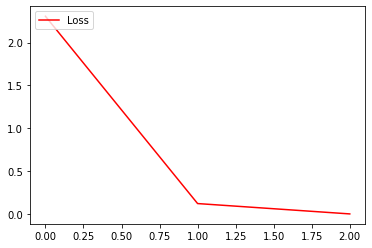

In [20]:
plotLoss(train_loss, "Loss_Train")

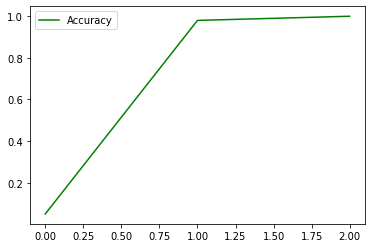

In [21]:
plotAccuracy(train_accuracy, "Accuracy_Train")

In [22]:
(test_loss, test_accuracy) = getLossAccuracy(cnn_test, data_loaders, 'test', details=True)

test loss: 0.00678
test accuracy: 1.00000


# PGD (UNTARGETED)

In [117]:
def getLossAccuracyAdversarial(cnn_model, adversarial_imgs, true_labels, details=False):
    
    true_labels = true_labels.type(torch.int64)
    
    cnn_model.eval()
    
    with torch.no_grad():
        
        correct = 0
        total = 0
        
        output_label, last_layer = cnn_model(adversarial_imgs)
        pred_y = torch.max(output_label, 1)[1].data.squeeze()
        
        #print(pred_y[0:20])
        #print(true_labels[0:20])
        
        accuracy = (pred_y == true_labels).sum().item() / float(true_labels.size(0))
        loss = LOSS_FUNCTION(output_label, true_labels).item()
    
    
    if details: print(dataset+' loss: %.5f' % loss)
    if details: print(dataset+' accuracy: %.5f' % accuracy)
        
    return (loss, accuracy)

In [118]:
def untargeted_pgd_attack(cnn_model, images, true_labels, eps=0.3, alpha=0.001, iterations=1):
    
    original_images = images.data
    
    for j in range(iterations):

        images.requires_grad = True
        (pred_label, _) = cnn_model(images)
        
        loss = LOSS_FUNCTION(pred_labeTl, true_labels )
        loss.backward()

        adv_images = images + alpha * images.grad.sign()
        eta = torch.clamp(adv_images - original_images, min=-eps, max=eps)
        images = torch.clamp(original_images + eta, min=0, max=1).detach_()
            
    return (loss, images, true_labels)

In [137]:
def pgd_train(cnn_model, data_load, optim, pgd_function, EPOCHS=2, eps=0.3, alpha=0.01, iterations=1):
    
    training_accuracy = []
    training_loss = []
    adv_training_loss = []
    adv_training_accuracy = []
    
    cnn_model.train()
    
    # Initial Training Loss and Accuracy
    (tr_loss, tr_accuracy) = getLossAccuracy(cnn_model, data_load, 'train')
    training_loss.append(tr_loss)
    adv_training_loss.append(tr_loss)
    training_accuracy.append(tr_accuracy)
    adv_training_accuracy.append(tr_accuracy)

    # Train the model
    total_step = len(data_load['train'])

    for epoch in range(EPOCHS):
        
        original_images = torch.empty(0,)
        adversarial_images = torch.empty(0,)
        adversarial_labels = torch.empty(0,)
        
        for i, (training_data, training_label) in enumerate(data_load['train']):            
            
            # PGD ATTACK TO PRODUCE ADVERSARIAL EXAMPLES ON THIS BATCH
            (pgd_loss, perturbed_imgs, pgd_label) = pgd_function(cnn_model, training_data, training_label, eps, alpha, iterations)
            
            # COLLECT ALL ADVERSARIAL EXAMPLES
            original_images = torch.cat((original_images, training_data),0)
            adversarial_images = torch.cat((adversarial_images, perturbed_imgs),0)
            adversarial_labels = torch.cat((adversarial_labels, pgd_label),0)
            
            # TRAIN MODEL BASED ON PERTURBED DATA AND UNTARGETTED LABEL
            batch_data = Variable(perturbed_imgs)
            batch_label = Variable(pgd_label)
            
            # PERFORM THE PREDICTION ON CURRENT DATA
            output_label, _ = cnn_model(batch_data)             
            
            # LOSS FUNCTION
            batch_training_loss = LOSS_FUNCTION(output_label, batch_label)
  
            # CLEAR GRADIENTS
            optim.zero_grad() 
        
            # CALCULATE GRADIENTS
            batch_training_loss.backward()   
            
            # UPDATE MODEL PARAMS
            optim.step()                

            if (i+1) % 200 == 0:
                print ('Epoch [{}/{}], Progress [{}/{}], Loss: {:.4f}' .format(epoch + 1, EPOCHS, i + 1, total_step, batch_training_loss))
        
        # GET LOSS AND ACCURACY AT EVERY EPOCH (ON PERTURBED DATA)            
        (tr_loss, tr_accuracy) = getLossAccuracyAdversarial(cnn_model, perturbed_imgs, pgd_label)
        adv_training_loss.append(tr_loss)
        adv_training_accuracy.append(tr_accuracy)
        #print ('      Adversarial Loss: {:.4f}, Adversarial Accuracy: {:.4f}' .format(tr_loss, tr_accuracy))
        
        # GET LOSS AND ACCURACY AT EVERY EPOCH (ON ORIGINAL TRAINING DATA)
        (tr_loss, tr_accuracy) = getLossAccuracy(cnn_model, data_load, 'train')            
        training_loss.append(tr_loss)
        training_accuracy.append(tr_accuracy)
        #print ('      Training Loss: {:.4f}, Training Accuracy: {:.4f}' .format(tr_loss, tr_accuracy))
            
    return (original_images, adversarial_images, adversarial_labels, 
            training_loss, training_accuracy, adv_training_loss, adv_training_accuracy)

### Example

In [138]:
cnn_unpgd = CNN1()
optimizer_unpgd = optim.Adam(cnn_unpgd.parameters(), lr = LEARNING_RATE)

In [139]:
(original_images, avd_img, avd_lab, 
 train_loss, train_acc, adv_loss, adv_acc) = pgd_train(cnn_model = cnn_unpgd, 
                                                       data_load=data_loaders, 
                                                       optim=optimizer_unpgd, 
                                                       pgd_function=untargeted_pgd_attack)

Epoch [1/2], Progress [200/600], Loss: 0.1111
Epoch [1/2], Progress [400/600], Loss: 0.0799
Epoch [1/2], Progress [600/600], Loss: 0.0187
Epoch [2/2], Progress [200/600], Loss: 0.0358
Epoch [2/2], Progress [400/600], Loss: 0.0643
Epoch [2/2], Progress [600/600], Loss: 0.0255


In [140]:
print("Accuracy on Adversarial Examples: "+str(adv_acc))
print("Accuracy on Original Training data: "+str(train_acc))

Accuracy on Adversarial Examples: [0.17, 1.0, 1.0]
Accuracy on Original Training data: [0.17, 0.96, 0.99]


In [141]:
print("Loss on Adversarial Examples: "+str(adv_loss))
print("Loss on Original Training data: "+str(train_loss))

Loss on Adversarial Examples: [2.290632724761963, 0.014237956143915653, 0.01568761095404625]
Loss on Original Training data: [2.290632724761963, 0.13560546934604645, 0.05196358636021614]


### Example 2 (Assignment Classifier Two)

In [238]:
eps = 0.3
alpha = 0.5
iterations = 1
testing_epochs = 2

classifier_two = CNN3()
optimizer_two = optim.Adam(classifier_two.parameters(), lr = 0.0005) 

In [239]:
(two_orginal_images, two_pgd_images, two_pgd_labels, 
 two_training_loss, two_training_accuracy, 
 two_adv_training_loss, two_adv_training_accuracy) = pgd_train(cnn_model = classifier_two, 
                                                               data_load = data_loaders, 
                                                               optim = optimizer_two, 
                                                               pgd_function = untargeted_pgd_attack, 
                                                               EPOCHS = testing_epochs, 
                                                               eps = eps, 
                                                               alpha = alpha,
                                                               iterations = iterations)

Epoch [1/2], Progress [200/600], Loss: 1.0951
Epoch [1/2], Progress [400/600], Loss: 0.5281
Epoch [1/2], Progress [600/600], Loss: 0.4981
Epoch [2/2], Progress [200/600], Loss: 0.4028
Epoch [2/2], Progress [400/600], Loss: 0.4205
Epoch [2/2], Progress [600/600], Loss: 0.1872


In [240]:
print("Accuracy on Adversarial Examples: "+str(two_adv_training_accuracy))
print("Accuracy on Original Training data: "+str(two_training_accuracy))

Accuracy on Adversarial Examples: [0.09, 0.85, 0.95]
Accuracy on Original Training data: [0.09, 0.42, 0.2]


In [244]:
(test_acc, adv_test_acc) = pgd_test(classifier_two, data_loaders, untargeted_pgd_attack, details=True) #UNTARGETED

Accuracy on original Test Set: 0.33000
Accuracy of Perturbed Test Set: 0.24720


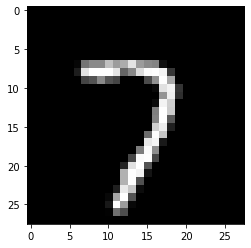

tensor(7.)


In [242]:
displayImage(two_orginal_images, 0)
print(two_pgd_labels[0])

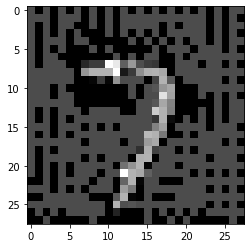

tensor(7.)


In [243]:
displayImage(two_pgd_images, 0)
print(two_pgd_labels[0])

### Example of Images Produced by NonTargeted PGD

In [34]:
for i, (training_data, training_label) in enumerate(data_loaders['train']):  
    if i==0:
        ex_train_img = training_data
        ex_train_lab = training_label

(_, adv_image_1, adv_label_1) = untargeted_pgd_attack(cnn_unpgd, ex_train_img, ex_train_lab, eps=0.3, alpha=0.01, iterations=1)
(_, adv_image_20, adv_label_20) = untargeted_pgd_attack(cnn_unpgd, ex_train_img, ex_train_lab, eps=0.3, alpha=0.01, iterations=20)
(_, adv_image_40, adv_label_40) = untargeted_pgd_attack(cnn_unpgd, ex_train_img, ex_train_lab, eps=0.3, alpha=0.01, iterations=40)

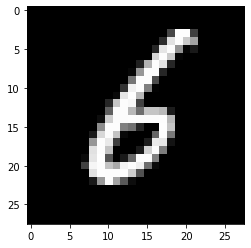

tensor(6)


In [35]:
displayImage(ex_train_img, 0)

print(ex_train_lab[0])

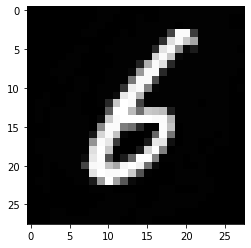

tensor(6)


In [36]:
displayImage(adv_image_1, 0)

print(adv_label_1[0])

In [ ]:
displayImage(adv_image_20, 0)

print(adv_label_20[0])

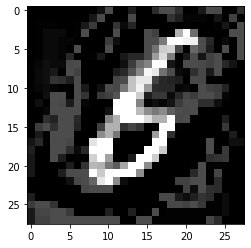

tensor(6)


In [37]:
displayImage(adv_image_40, 0)

print(adv_label_40[0])

In [38]:
torch.eq(ex_train_img[0], adv_image_40[0])

tensor([[[ True,  True,  True,  True,  True,  True,  True,  True,  True, False,
          False,  True,  True, False,  True,  True, False, False, False, False,
           True,  True, False, False, False,  True,  True, False],
         [ True,  True,  True,  True,  True,  True,  True,  True, False, False,
           True,  True,  True, False,  True,  True,  True,  True, False, False,
          False, False, False,  True, False,  True, False,  True],
         [ True, False, False, False,  True,  True, False, False, False,  True,
           True, False, False, False,  True,  True,  True,  True,  True,  True,
          False,  True,  True,  True, False, False,  True, False],
         [ True, False, False, False, False,  True, False, False,  True,  True,
           True, False,  True,  True,  True, False, False,  True, False, False,
          False, False,  True,  True,  True,  True, False, False],
         [ True, False, False, False, False, False,  True,  True,  True,  True,
          Fa

# PGD (TARGETED)

In [85]:
def targeted_pgd_attack(cnn_model, images, true_labels, eps=0.3, alpha=0.001, iterations=1, details=False):
    
    original_images = images.data
    
    for j in range(iterations):\

        images.requires_grad = True
        (pred_label, _) = cnn_model(images)
        
        loss = LOSS_FUNCTION(pred_label, true_labels)
        loss.backward()

        adv_images = images + alpha * images.grad.sign()
        eta = torch.clamp(adv_images - original_images, min=-eps, max=eps)
        images = torch.clamp(original_images + eta, min=0, max=1).detach_()
        
    if details: print("____________________________________________ BEFORE PERTURBATION")
    if details: displayImage(original_images, 0)
    if details: print("TRUE LABEL:" + str(true_labels[0]))
        
    targeted_label, _ = cnn_model(images)
    
    if details: print("____________________________________________ AFTER PERTURBATION (TARGETTED)")
    if details: displayImage(images, 0)
    if details: print("CNN RESULT:" + str(targeted_label[0]))
    
    # DO NOT ALLOW TO CHOOSE TRUE LABEL
    targeted_label = [elem.detach().numpy() for elem in targeted_label]
    targeted_label = [removeTrueLabelFromTensor(targeted_label[i], true_labels[i]) for i in range(len(targeted_label))]
    targeted_label = torch.Tensor(targeted_label)
    targeted_label = torch.max(targeted_label, 1)[1].data.squeeze()
    
    if details: print("AKA: "+str(targeted_label[0]))
            
    return (loss, images, targeted_label)

### Example

In [86]:
cnn_pgd = CNN1()
optimizer_pgd = optim.Adam(cnn_pgd.parameters(), lr = LEARNING_RATE)

In [87]:
(original_images_pgd, avd_img_pgd, avd_lab_pgd, 
 train_loss_pgd, train_acc_pgd, adv_loss_pgd, adv_acc_pgd) = pgd_train(cnn_pgd, data_loaders, optimizer_pgd, targeted_pgd_attack)

Epoch [1/2], Progress [200/600], Loss: 0.0033
Epoch [1/2], Progress [400/600], Loss: 0.0001
Epoch [1/2], Progress [600/600], Loss: 0.0000
Epoch [2/2], Progress [200/600], Loss: 0.0029
Epoch [2/2], Progress [400/600], Loss: 0.0000
Epoch [2/2], Progress [600/600], Loss: 0.0000


In [88]:
print("Accuracy on Adversarial Examples: "+str(adv_acc_pgd))
print("Accuracy on Original Training data: "+str(train_acc_pgd))

Accuracy on Adversarial Examples: [0.19, 1.0, 1.0]
Accuracy on Original Training data: [0.19, 0.11, 0.08]


### Example of Images Produced by Targeted PGD

In [89]:
for i, (training_data, training_label) in enumerate(data_loaders['train']):  
    if i in [0]:
        ex_train_img = training_data
        ex_train_lab = training_label

(_, adv_image_1_pgd, adv_label_1_pgd) = targeted_pgd_attack(cnn_pgd, ex_train_img, ex_train_lab, eps=0.3, alpha=0.01, iterations=1)
(_, adv_image_40_pgd, adv_label_40_pgd) = targeted_pgd_attack(cnn_pgd, ex_train_img, ex_train_lab, eps=0.3, alpha=0.01, iterations=40)

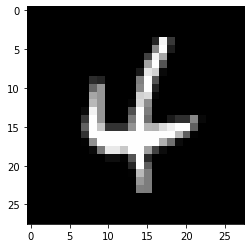

tensor(4)


In [91]:
displayImage(ex_train_img, 0)

print(ex_train_lab[0])

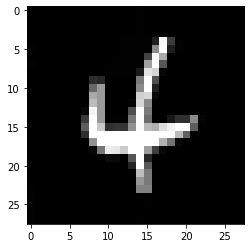

tensor(1)


In [92]:
displayImage(adv_image_1_pgd, 0)

print(adv_label_1_pgd[0])

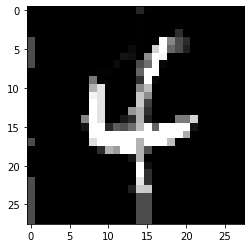

tensor(1)


In [93]:
displayImage(adv_image_40_pgd, 0)

print(adv_label_40_pgd[0])

In [94]:
torch.eq(ex_train_img[0], adv_image_40_pgd[0]) #ALTHOUGH IMPERSEPTIBLE TO HUMAN EYE, STILL HAS A LOT OF DIFFERENCES IN VALUES

tensor([[[ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
           True,  True,  True,  True, False, False,  True,  True,  True,  True,
           True,  True,  True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
           True,  True,  True,  True, False,  True,  True,  True,  True,  True,
           True,  True,  True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
           True,  True,  True,  True, False,  True,  True,  True,  True,  True,
           True,  True,  True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
           True,  True,  True,  True, False,  True,  True,  True,  True, False,
           True,  True,  True,  True,  True,  True,  True,  True],
         [False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
           T

## Evaluating on Test Data

In [95]:
def pgd_test(cnn_model, data_load, pgd_function, eps=0.3, alpha=0.01, iterations=1, details=False):
    
    (_, test_accuracy) = getLossAccuracy(cnn_model, data_load, 'test', details=False)
    
    if eps == 0:
        
        pgd_accuracy = test_accuracy
        
    else:        
        adversarial_images = torch.empty(0,)
        adversarial_labels = torch.empty(0,)
    
        total_step = len(data_load['test'])

        for i, (testing_images, true_value) in enumerate(data_load['test']): 
            
            (_, perturbed_imgs, pgd_label) = pgd_function(cnn_model, testing_images, true_value, eps, alpha, iterations)
            adversarial_images = torch.cat((adversarial_images, perturbed_imgs), 0)
            adversarial_labels = torch.cat((adversarial_labels, pgd_label), 0)
            
        (_, pgd_accuracy) = getLossAccuracyAdversarial(cnn_model, adversarial_images, adversarial_labels)
    
    if details: print('Accuracy on original Test Set: %.5f' % test_accuracy)
    if details: print('Accuracy of Perturbed Test Set: %.5f' % pgd_accuracy)
        
    return (test_accuracy, pgd_accuracy)

### Example

In [241]:
(test_acc, adv_test_acc) = pgd_test(classifier_two, data_loaders, untargeted_pgd_attack, details=True) #UNTARGETED

Accuracy on original Test Set: 0.24000
Accuracy of Perturbed Test Set: 0.24720


In [97]:
(test_acc_pgd, adv_test_acc_pgd) = pgd_test(cnn_pgd, data_loaders, targeted_pgd_attack, details=True) #TARGETED

Accuracy on original Test Set: 0.14000
Accuracy of Perturbed Test Set: 1.00000
